# **Importing required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# **Reading the dataset**

In [2]:
data = pd.read_csv("/content/insurance.csv")

# **Understanding the data by performing various operations**

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.shape

(1338, 7)

In [7]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
data["charges"].max()

63770.42801

In [11]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

# **Handling null values**

In [12]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
data['age'].fillna(data['age'].mean(),inplace=True)

# **Data Visualization**

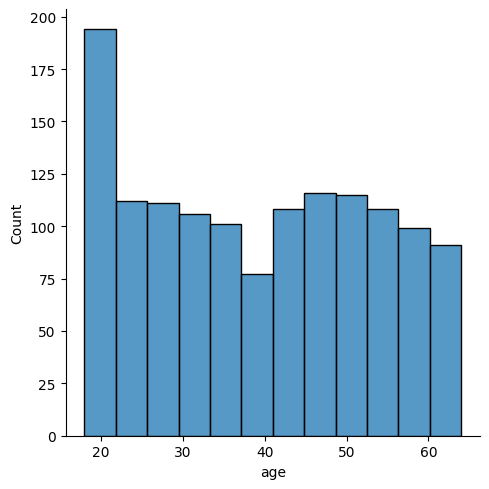

In [70]:
sns.displot(data['age'])

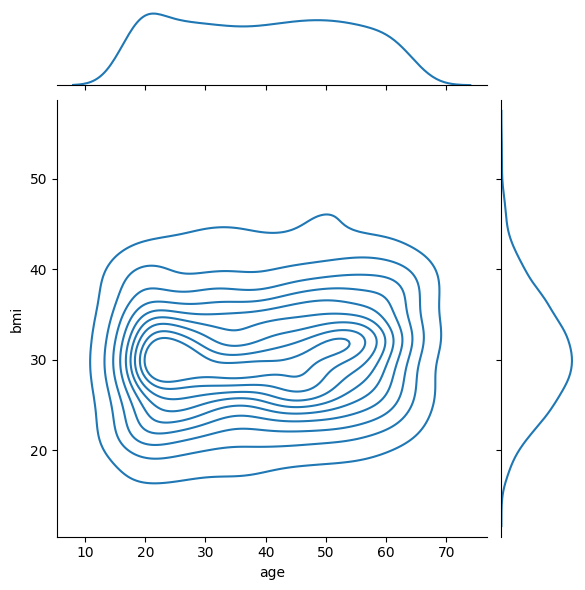

In [15]:
sns.jointplot(x=data['age'], y=data['bmi'], kind="kde")

<Axes: xlabel='age', ylabel='charges'>

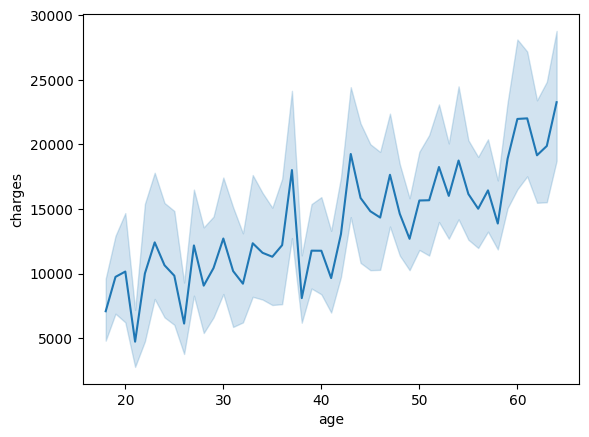

In [16]:
sns.lineplot(x=data['age'], y=data['charges'])

## *Checking for outliers*

<Axes: ylabel='age'>

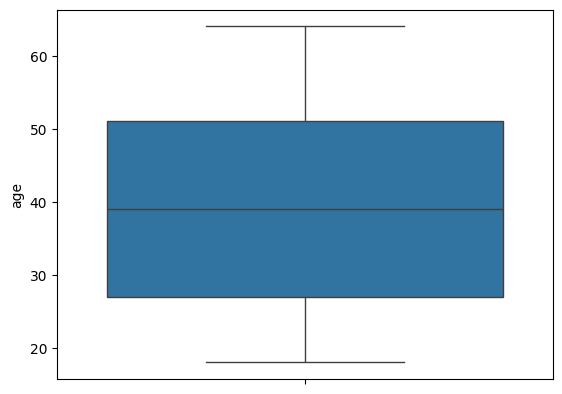

In [19]:
sns.boxplot(data['age'])

# **Label Encoding**

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['region'] = label_encoder.fit_transform(data['region'])

In [23]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# **Seperating the data**

In [24]:
x=data.drop(columns=['charges'],axis=1)
y=data["charges"]
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [25]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# **Scaling**

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)
X


array([[-1.43876426, -1.0105187 , -0.45332   , -0.90861367,  1.97058663,
         1.34390459],
       [-1.50996545,  0.98959079,  0.5096211 , -0.07876719, -0.5074631 ,
         0.43849455],
       [-0.79795355,  0.98959079,  0.38330685,  1.58092576, -0.5074631 ,
         0.43849455],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.29636188, -1.0105187 , -0.79781341, -0.90861367, -0.5074631 ,
         1.34390459],
       [ 1.55168573, -1.0105187 , -0.26138796, -0.90861367,  1.97058663,
        -0.46691549]])

In [28]:
X = pd.DataFrame(x)
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


# **Splitting the data**

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
x_train.head()



,age,sex,bmi,children,smoker,region
621,37,1,34.100,4,1,3
194,18,1,34.430,0,0,2
240,23,0,36.670,2,1,0
1168,32,1,35.200,2,0,3
1192,58,0,32.395,1,0,0


In [31]:
x_test.head()

,age,sex,bmi,children,smoker,region
578,52,1,30.200,1,0,3
610,47,0,29.370,1,0,2
569,48,1,40.565,2,1,1
1034,61,1,38.380,0,0,1
198,51,0,18.050,0,0,1


In [32]:
y_train.head()

621     40182.24600
194      1137.46970
240     38511.62830
1168     4670.64000
1192    13019.16105
Name: charges, dtype: float64

In [33]:
y_test.head()

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
Name: charges, dtype: float64

# **Model Building**

In [56]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [57]:
y_pred= rfr.predict(x_test)
y_pred

array([11609.4556934 , 10619.2332288 , 44467.0245318 , 13091.8750475 ,
        9733.152061  , 10742.5037468 ,  2164.586559  , 12576.0464307 ,
        7895.7092326 ,  6017.429715  ,  7262.472405  , 19663.0262632 ,
        8448.6607094 ,  6058.9516295 , 22760.9350725 , 12365.0034897 ,
       13056.3974343 , 10895.5216682 ,  6476.168428  , 33983.901811  ,
       23858.272554  , 13638.6494681 , 10832.3621164 , 27310.5687807 ,
        2637.0898192 , 10414.5397389 ,  7176.9581844 ,  8163.9325292 ,
        3744.151922  , 11954.2210164 ,  7903.0005436 , 48205.0594811 ,
       14060.7813105 , 11474.4446534 , 15399.1981026 ,  4047.414582  ,
        8782.0891714 , 37425.4292279 , 39429.9762375 ,  8140.7688885 ,
        9151.9753978 ,  3471.3234432 , 21018.473865  , 47271.3729785 ,
       36826.3584633 ,  5377.6642776 , 13135.2851371 ,  6873.2480935 ,
        6567.8612564 , 13596.2432647 ,  4126.46999   , 14092.1625164 ,
       28602.6347121 , 48704.5988106 , 11682.7215465 , 10635.8696397 ,
      

In [58]:
y_test

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
1084    15019.76005
726      6664.68595
1132    20709.02034
725     40932.42950
963      9500.57305
Name: charges, Length: 268, dtype: float64

In [61]:
from sklearn.metrics import r2_score
acc = r2_score(y_pred,y_test)
print(acc*100)

86.7249340187793
